# Técnicas avanzadas de análisis de datos

--- 


Karina Gisele Nicoletti

Fecha: 27/01/2020

--- 

##  1- Selección del algoritmo

El trabajo será realizado utilizando el algoritmo **Regresión logística**:

#### Regresión logística

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica en función de las variables independientes. 

Puede ser utilizada para problemas de clasificación como detección de Spam, clasificar células tumorales, veracidad de un billete, etc.

Los ejemplos mencionados corresponden a regresión logística binaria, en donde el resultado puede tomar uno de dos valores posibles. Sin embargo, también puede aplicarse para casos en donde el resultado puede tomar más de 2 valores (regresión logística multinomial), pero no será abordado en este trabajo.

Información más detallada puede encontrarse en scikit-learn.org:

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

#### Relación con otros algoritmos

La regresión logística es un caso especial de regresión lineal en donde la variable target es categórica por naturaleza. La regresión logística predice la probabilidad de ocurrencia de un evento binario utilizando la función "logit" o función sigmoidea.

La ecuación de regresión lineal está dada por:
$$\hat y=w_0 + w_1x_1 + w_2 x_2  + \ldots + w_m x_M$$

La función sigmoidea es:

$$ p = 1 / (1 + e^-y) $$

Reemplazando el valor de y por la ecuación lineal, obtenemos la ecuación de la regresión logarítmica:

$$ p = 1 / (1 + e^-(y=w_0 + w_1x_1 + w_2 x_2  + \ldots + w_m x_M)) $$


#### Obtención de pesos

Los pesos de cada coeficiente se obtienen minimizando la función de coste, que en el caso de la regresión logística es de la forma:

$$J(\boldsymbol{\omega}) = \sum_{i=1}^N \log{\left(1+ e^{-y^{(i)}\boldsymbol{\omega}^T\mathbf{x}^{(i)}}\right)}$$

donde $y^{(i)} \in \{-1, 1\}$. En su versión "regularizada", la función de coste pasa a ser:

$$J(\boldsymbol{\omega}) = \frac{1}{2}||\boldsymbol{\omega}||_2^2 + C \sum_{i=1}^N \log{\left(1+ e^{-y^{(i)}\boldsymbol{\omega}^T\mathbf{x}^{(i)}}\right)}$$


## 2- Selección de conjunto de datos públicos

Se seleccionó un conjunto de datos públicos obtenido de un análisis de billetes (dólares o euros) con el objetivo de identificar si son Falsos o Auténticos (Verdadero).

El dataset se obtuvo del UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

Y presenta 4 atributos en cada uno de los registros:

1. Varianza de la imagen transformada de Wavelet (continua)
2. Asimetría de la imagen transformada de Wavelet (continua)
3. Curtosis de la imagen transformada de Wavelet (continua)
4. Entropía de imagen (continua)

 
Se buscará como objetivo predecir la autenticidad o no de un billete a partir de los atributos mencionados.




### Descarga de datos

In [3]:
#Se descargan los datos del UCI Machine Learning Repository
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"


### Preparación del entorno 

Se importan las librerías necesarias para el funcionamiento del código

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Análisis exploratorio de los datos
Cargamos los datos, los visualizamos y hacemos un análisis exploratorio de los mismos:

In [5]:
#Se asigna la identificación de cada columna, teniendo en cuenta que el último campo corresponde a la autenticidad del billete ('Class)'.
colnames=['Varianza','Asimetría','Curtosis','Entropía','Class']

bankdata=pd.read_csv(url,names=colnames)
bankdata.describe
bankdata.head()  #Visualizamos el formato de los primeros 5 datos.

,Varianza,Asimetría,Curtosis,Entropía,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# Visualizamos algunos datos en orden aleatorio
bankdata.sample(n=5)

,Varianza,Asimetría,Curtosis,Entropía,Class
829,-2.24820,3.09150,-2.39690,-2.671100,1
499,0.88444,6.59060,0.55837,-0.441820,0
391,2.12650,6.87830,0.44784,-2.222400,0
1241,-2.28110,-0.85669,2.71850,0.044382,1
787,-2.66850,-10.45190,9.11390,-1.732300,1


In [6]:
# Tamaño y tipo de datos
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Varianza     1372 non-null float64
Asimetría    1372 non-null float64
Curtosis     1372 non-null float64
Entropía     1372 non-null float64
Class        1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Se observa que el tipo de datos que fue identificado de forma automática, es correcto (Float 64 para las variables e int 64 para el tipo de billete ('Class').

In [65]:
#Se utiliza la función describe para obtener información estadística como media, rango, desvío, etc.
bankdata.describe(include='all')

,Varianza,Asimetría,Curtosis,Entropía,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
#Se evalúa si hay algún dato faltante (null)
missing_data=bankdata.isnull()
missing_data.tail()
missing_data.sum(axis=0)

Varianza     0
Asimetría    0
Curtosis     0
Entropía     0
Class        0
dtype: int64

Se encuentra que el dataset no contiene valores null.

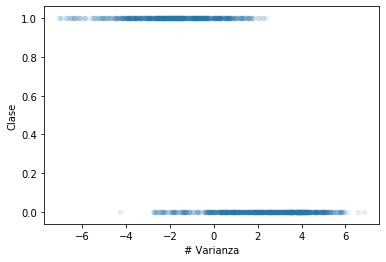

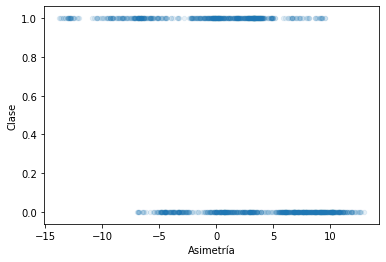

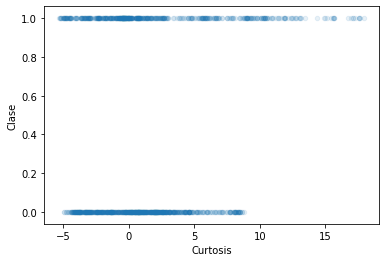

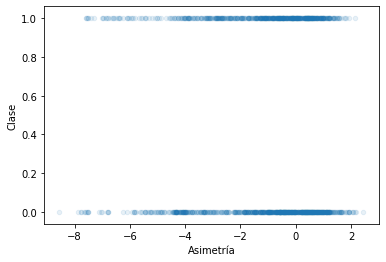

In [75]:
#Visualizamos con se relaciona cada variable independiente con la variable objetivo:
bankdata.plot(kind = 'scatter', x='Varianza', y = 'Class', alpha=0.1)
plt.xlabel('# Varianza')
plt.ylabel('Clase')
plt.show()

bankdata.plot(kind = 'scatter', x='Asimetría', y = 'Class', alpha=0.1)
plt.xlabel('Asimetría')
plt.ylabel('Clase')
plt.show()

bankdata.plot(kind = 'scatter', x='Curtosis', y = 'Class', alpha=0.1)
plt.xlabel('Curtosis')
plt.ylabel('Clase')
plt.show()

bankdata.plot(kind = 'scatter', x='Entropía', y = 'Class', alpha=0.1)
plt.xlabel('Asimetría')
plt.ylabel('Clase')
plt.show()


A continuación se visualizan en formato de histograma los 4 atributos del dataset, facilitando la visualización de entre qué valores comprenden sus máximos y mínimos, y en qué intervalors concentran la mayor densidad de registros.

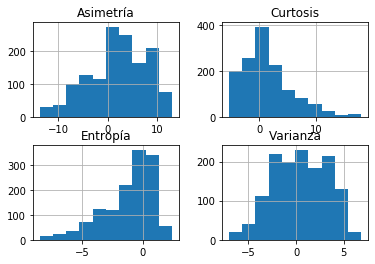

In [10]:
bankdata.drop(['Class'],1).hist()
plt.show()

### Creación del modelo

In [12]:
#Confirmamos que el dataset posee la variable de estudio (Class) y los 4 atributos,
#debiendo arrojar un resultado de 5 columnas:
bankdata.shape

(1372, 5)

Se cargan las variables de las 4 columnas de entrada en el vector X, excluyendo la primer columna Class con el método drop(). Esta columna, que será la variable que deseamos predecir, se cargará en el vector y.

In [8]:
X=np.array(bankdata.drop(['Class'],1))#Creamos vector con variable dependiente
y=np.array(bankdata['Class'])
X.shape #Verificamos que el vector X posee 4 columnas.

(1372, 4)

In [9]:
#Importamos el modelo que vamos a utilizar
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X,y)  #Entrenamos al modelo con nuestro conjuntos total de datos


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Al modelo le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método predict() y revisamos visualmente las salidas. Tal como se observa a continuación, las predicciones coinciden a priori con el resultado real (se encontraban ordenados primero los de clase 0 y luego los de clase 1).

In [15]:
predictions=model.predict(X)
print(predictions)

[0 0 0 ... 1 1 1]


In [16]:
#Confirmamos cuan bueno fue el modelo con model.score() que devuelve la precisión media de las predicciones.
model.score(X,y)

0.9905247813411079

Se obtuvo una precisión media de 99,05%. Sin embargo, para objtener mejor garantía del modelo generado, se verá a continuación como validar el modelo a través de dividir el conjunto de datos en un grupo de entrenamiento y otro de test.

## 3- Evaluación de los resultados - Validación del modelo 

In [10]:
# creamos un vector con la variable objetivo
target_var = 'Class'
y = bankdata[target_var].values.copy()

feature_vars = ['Varianza','Asimetría','Curtosis','Entropía']

# creamos la matriz de variables independientes
X = bankdata[feature_vars].values.copy()


In [11]:
# Se importa la función para dividir el conjunto de datos
from sklearn.model_selection import train_test_split

# Se separan los datos en conjunto de entrenamiento (80% de los datos) y conjunto de test (20% de los datos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22) # Se fija un estado aleatorio para garantizar la reproducibilidad de los resultados


X_train.shape  #Se verifica el tamaño resultante, debiendo ser 80% de 1372.


(1097, 4)

A continuación se evalúa cómo se ajusta el modelo en ambos conjuntos de datos (entrenamiento y test):

In [12]:
# Se ajusta el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

cf=model.coef_
print(cf)
print(cf[0,:])
print(feature_vars)

pd.Series(cf[0,:], index=feature_vars) # Se visualizan los coeficientes obtenidos para cada variable (los parámetros del modelo).

[[-3.04065656 -1.69978599 -2.0550756  -0.11917814]]
[-3.04065656 -1.69978599 -2.0550756  -0.11917814]
['Varianza', 'Asimetría', 'Curtosis', 'Entropía']


Varianza    -3.040657
Asimetría   -1.699786
Curtosis    -2.055076
Entropía    -0.119178
dtype: float64

In [13]:
#Validamos
print('Métrica R2 en entrenamiento:', model.score(X_train, y_train))
print('Métrica R2 en test:', model.score(X_test, y_test))

Métrica R2 en entrenamiento: 0.9872379216043756
Métrica R2 en test: 0.9927272727272727


Se observa que el modelo se ajusta de forma similar en el conjunto de datos de test (99,27%) y en el de entrenamiento (98,72%).

Para confirmar que es confiable este resultado, se utilizará la validación cruzada K-fold, en donde se repite el procedimiento varias veces generando diferentes conjuntos de entrenamiento y test (4 en este caso).


In [14]:
# Importamos el cross_validate
from sklearn.model_selection import cross_validate

n_folds = 4 # Se realiza la validación cruzada K-fold en el número especificado (4)

scoring = ['neg_mean_squared_error', 'r2']
cv_results = cross_validate(model, X, y, cv=n_folds, return_train_score=True, return_estimator=True, scoring=scoring)
cv_results

{'fit_time': array([0.        , 0.01659989, 0.00199986, 0.00199986]),
 'score_time': array([0.        , 0.00100017, 0.00099993, 0.00100017]),
 'estimator': (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False),
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False),
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     mu

Se observa que el modelo se ajusta bien y de forma similar en los conjuntos de entrenamiento y de test en cada uno de los folds. El modelo está generalizando bien.


## 5- Parámetros del modelo


Se trata de un método paramétrico porque el modelo tiene un conjunto limitado de parámetros, que dependerá de la cantidad de variables que incorpore el modelo:


$$ p = 1 / (1 + e^-(y=w_0 + w_1x_1 + w_2 x_2  + \ldots + w_m x_M)) $$

En donde los parámetros están dados por:

$$ w_0 , w_1 ... w_n $$


Tal como se mencionó anteriormente durante la creación y ajuste del modelo, los parámetros obtenidos son los siguientes:

In [15]:
model.fit(X_train, y_train)  #ajuste del modelo

cf=model.coef_  #coeficientes del modelo
print(model.intercept_)
pd.Series(cf[0,:], index=feature_vars)

[3.00973948]


Varianza    -3.040657
Asimetría   -1.699786
Curtosis    -2.055076
Entropía    -0.119178
dtype: float64

Los parámetros son:$$ w_0= 3.009, w_1=-3.04, w_2=-1.699, w_3= -2.05, w_4=-0,12 $$ 

## 6 - Hiperparámetros del modelo

La función de coste a minimizar en la regresión logística es de la forma:

$$J(\boldsymbol{\omega}) = \sum_{i=1}^N \log{\left(1+ e^{-y^{(i)}\boldsymbol{\omega}^T\mathbf{x}^{(i)}}\right)}$$

donde $y^{(i)} \in \{-1, 1\}$. En su versión "regularizada", la función de coste pasa a ser:

$$J(\boldsymbol{\omega}) = \frac{1}{2}||\boldsymbol{\omega}||_2^2 + C \sum_{i=1}^N \log{\left(1+ e^{-y^{(i)}\boldsymbol{\omega}^T\mathbf{x}^{(i)}}\right)}$$

El **coste $C$** es el **hiperparámetro** libre que permite controlar la complejidad del algoritmo, penalizando los errores que se comenten en clasificación. Este parámetro supone un compromiso entre la exactitud de la solución y la complejidad del algoritmo. 

El valor por defecto en scikit-learn es C= 1. Cuanto mayor es C, más se penalizan los errores. Cuanto menor es C, menos se penalizan.


In [16]:

######default C=1#####
model1=LogisticRegression().fit(X_train,y_train)
print("training set score: %f" % model1.score(X_train, y_train))
print('\n'"test set score: %f" % model1.score(X_test, y_test))
 
######increase C to 100#####
model100=LogisticRegression(C=100).fit(X_train,y_train)
print('\n'"training set score of lgr100: %f" % model100.score(X_train, y_train))
print('\n'"test set score of lgr100: %f" % model100.score(X_test, y_test))
 
######decrease C to 0.01#####
model001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('\n'"training set score of lgr001: %f" % model001.score(X_train, y_train))
print('\n'"test set score of lgr001: %f" % model001.score(X_test, y_test))
 

training set score: 0.987238

test set score: 0.992727

training set score of lgr100: 0.990884

test set score of lgr100: 0.992727

training set score of lgr001: 0.971741

test set score of lgr001: 0.989091


Se aprecia que al ser mayor el C (C=100), más se penalizan los errores y se obtiene un R2 mayor, ajustándose mejor el modelo: 0,99.
    
Por el contrario, en la medida que disminuye C, los errores se penalizan menos y disminuye el ajuste del mismo.

### Valor óptimo de C

Se calcula el valor óptimo de C:

best mean cross-validation score: 0.958
best parameters: {'C': 23.357214690901213}
test-set score: 0.96


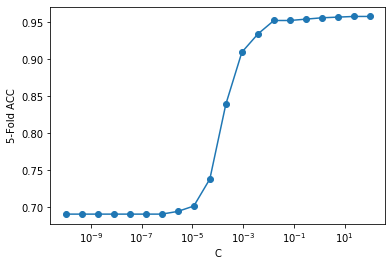

In [17]:
from sklearn.model_selection import GridSearchCV

#poly     = PolynomialFeatures(2)
#X3poly   = poly.fit_transform(X3)
#X_train, X_test, y_train, y_test = train_test_split(X3poly, y3, test_size=0.3, shuffle=True, random_state=0)

vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring='accuracy', param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC, scores, '-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

## 7- Escalado de variables

Volvemos a realizar bankdata.describe() para analizar rango de variación de cada variable:

In [9]:
bankdata.describe()

,Varianza,Asimetría,Curtosis,Entropía,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Se observa que el rango de variación es muy similar entre cada variable, por lo que no debería encontrarse una variación significativa al realizar un escalado sobre estos datos. Lo verificaremos:

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler();
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

print('Métrica R2 en entrenamiento:', model.score(X_train_scaled, y_train))
print('Métrica R2 en test:', model.score(X_test_scaled, y_test))

Métrica R2 en entrenamiento: 0.9772105742935278
Métrica R2 en test: 0.9963636363636363


Los valores de R2 obtenidos son prácticamente iguales que los que se obtienen sin el escalado:


Métrica R2 en entrenamiento: 0.9872379216043756

Métrica R2 en test: 0.9927272727272727

Lo que significa que el algoritmo es **invariante a la escala**. 

Se calculan a continuación los coeficientes:


In [18]:
cf=model.coef_
pd.Series(cf[0,:], index=feature_vars)

Varianza    -3.040657
Asimetría   -1.699786
Curtosis    -2.055076
Entropía    -0.119178
dtype: float64

Se encuentra que los coeficientes han cambiado ligeramente tras absorber las diferencias de escala, ahora nos dan una mejor idea  de la importancia relativa entre las variables:

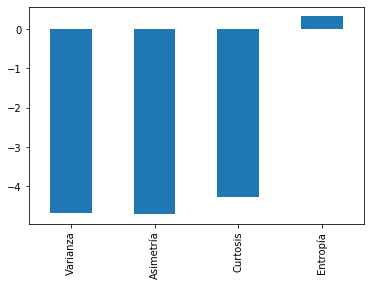

In [33]:
pd.Series(cf[0,:], index=feature_vars).plot.bar();

## 8 - Métrica de bondad que optimiza el algoritmo


Por dejecto, el algoritmo utiliza el $R^2$ como métrica de bondad.
Pueden utilizarse otras métricas. En scikit-learn se encuentra una descripción más detallada de cada una de ellas:

https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics


## 9 - Incertidumbre de la solución

A través del cálculo del p-value podría valorarse la incertidumbre de la solución.
el mismo puede calcularse con el stats model package:

In [19]:

import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2187.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:26:10   Log-Likelihood:                 385.64
No. Observations:                1372   AIC:                            -761.3
Df Residuals:                    1367   BIC:                            -735.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7980      0.008    103.927      0.0

## 10 - Importancia relativa de las variables

Sí, es posible deducir cuáles son las características más relevantes para el funcionamiento. Para ello se debe aplicar un método de filtrado para un problema de clasificación, como el que se presenta en este trabajo.

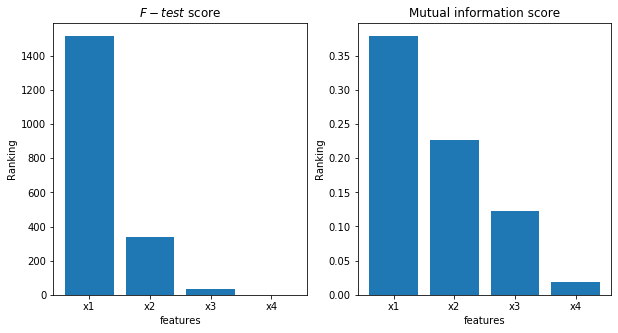

In [20]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import f_classif, mutual_info_classif

featureNames = ['x1','x2','x3','x4']

# do calculations
f_test, _ = f_classif(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]), f_test,  align="center")
plt.xticks(range(X.shape[1]), featureNames)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')


plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),featureNames)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Se observa que la varianza y la asimetría son las características más relevantes delm modelo.